# 數據可視化

Step1:


首先我們將波士頓房價的資料從sklearn中的datasets取出來

然後將此分為train_set和test_set兩種
並分別設作X,y

另外,我們透過boston.feature_names找出影響房價的因素

In [21]:
#load data from sklearn datasets
import pandas as pd
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target
print(boston.keys())
X, boston.feature_names, X.shape, 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'),
 (506, 13))

首先我們將13個因素以圖表的方式呈現

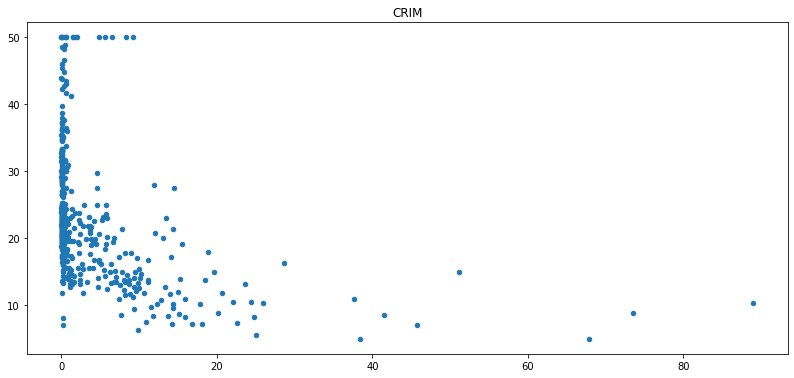

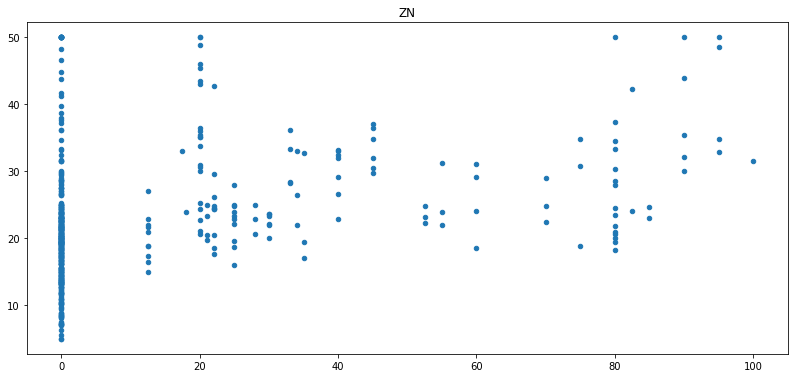

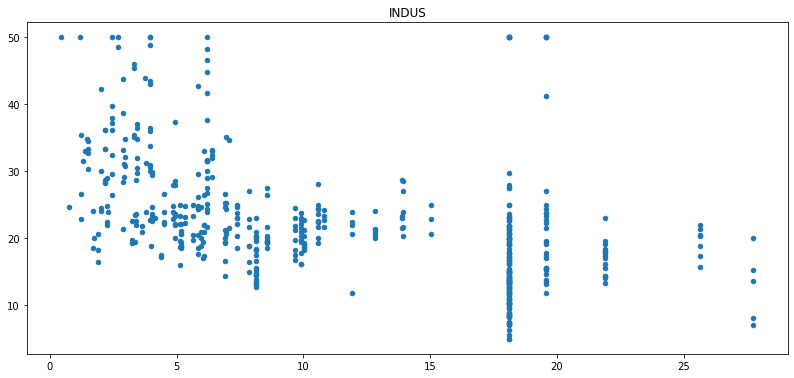

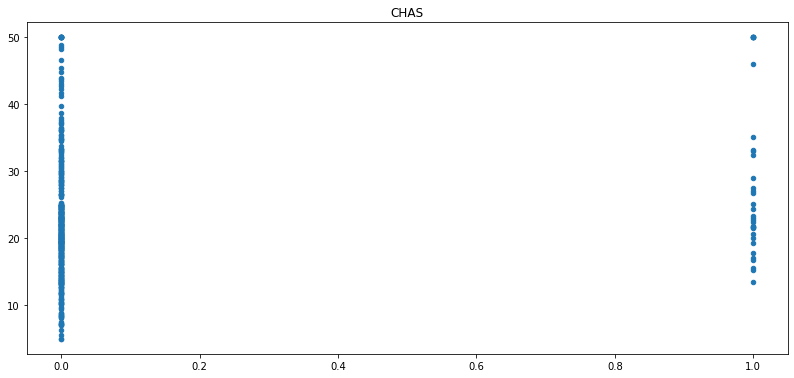

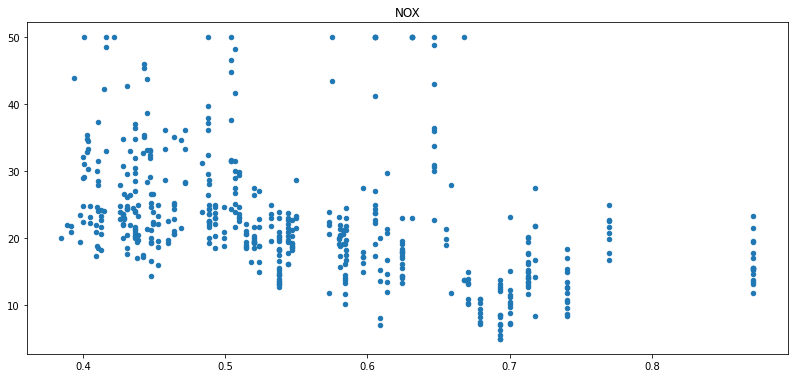

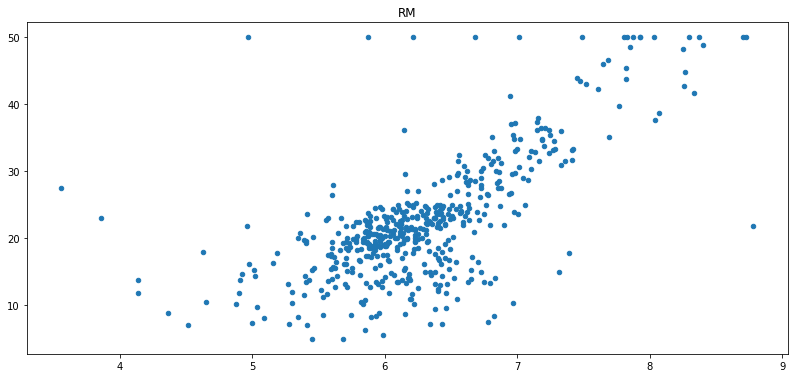

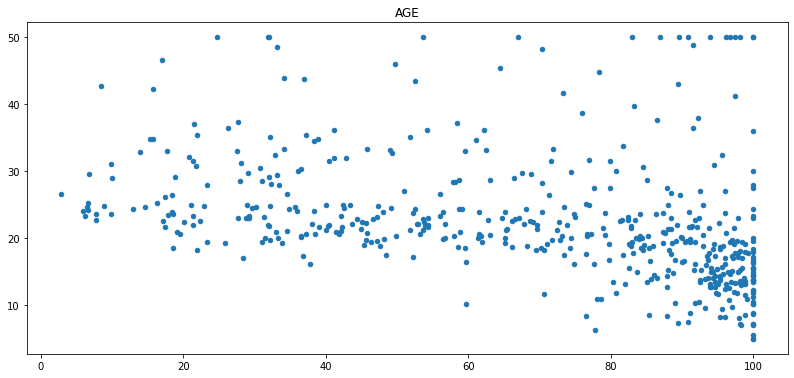

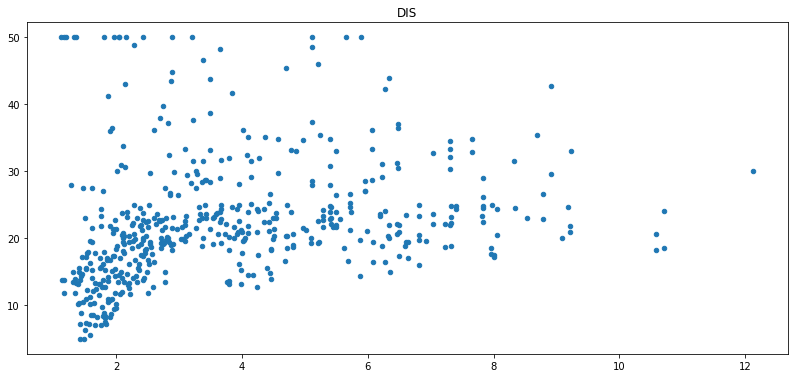

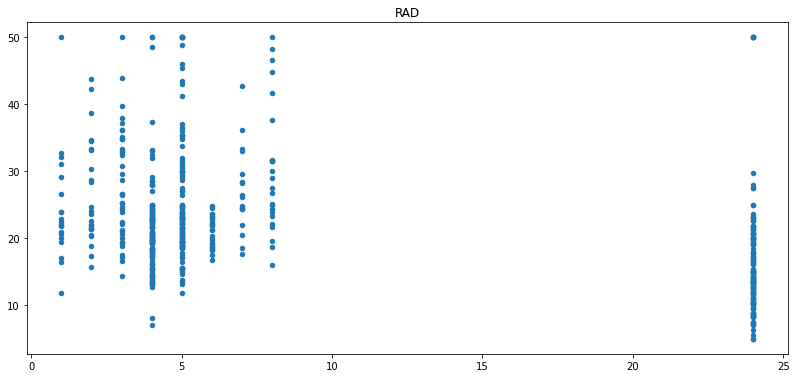

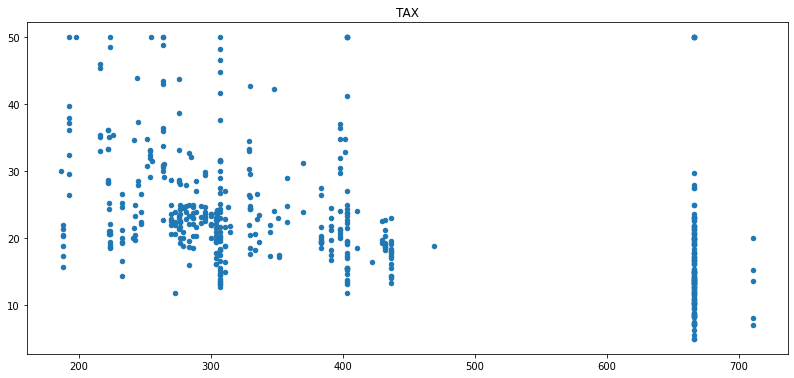

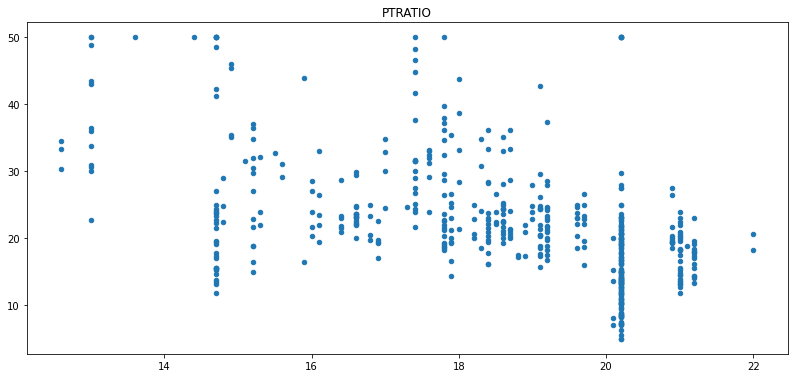

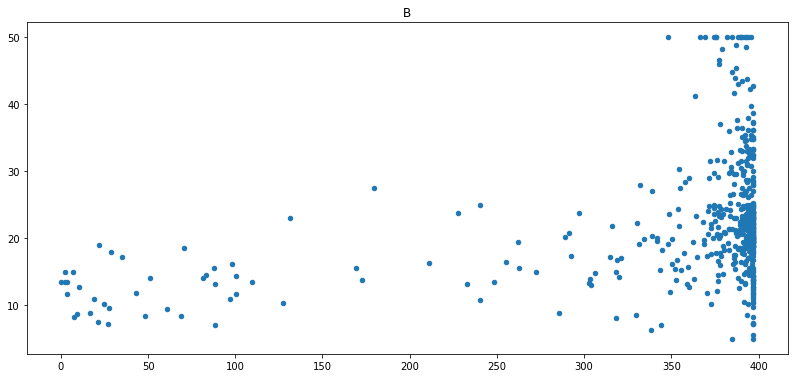

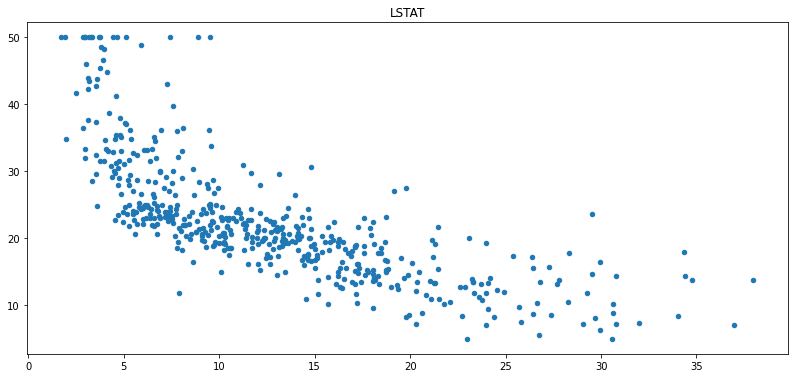

In [22]:
import matplotlib.pyplot as plt
from sklearn import datasets
boston = datasets.load_boston()
X, y = boston.data, boston.target

for i in range(13):
  plt.figure(figsize=(30, 50))
  plt.subplot(7,2,i+1)
  plt.scatter(X[:,i],y,s=20)
  plt.title(boston.feature_names[i])
  
  plt.show

Step2:
將影響房價的因素整理成dataframe數據集
並藉由以下程式碼去看出他們之間的相關係數

In [23]:
#整理成dataframe數據集
df = pd.DataFrame(X,columns=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT'])
df['MEDVprice'] = pd.DataFrame(y,columns=['MEDVprice'])
X = df.iloc[:,0:13]
y = df.iloc[:,-1]
#查看其相關係數
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDVprice
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


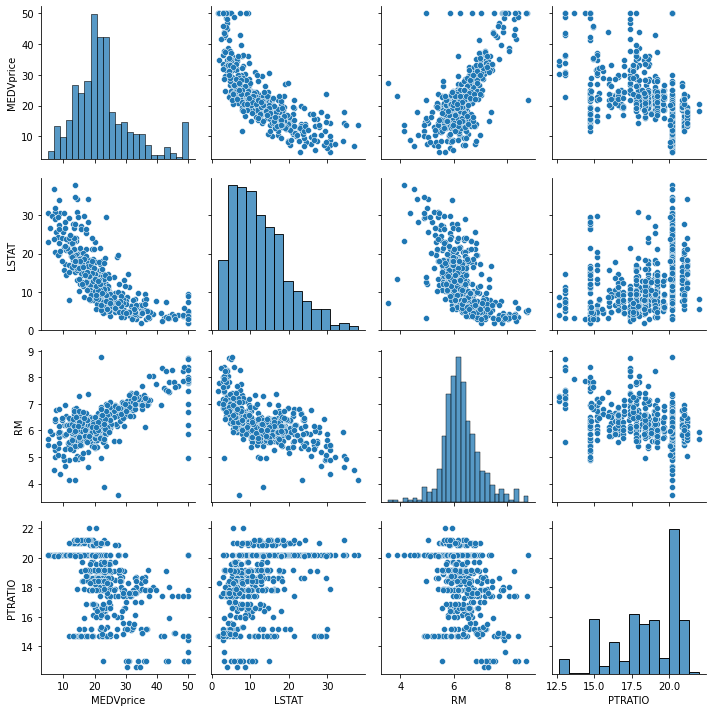

In [24]:

import matplotlib.pyplot as plt 
import seaborn as sns
cols = ['MEDVprice','LSTAT', 'RM', 'PTRATIO']
--1,-0.73,0.69,-0.5
sns.pairplot(df[cols], height=2.5)
plt.tight_layout()
plt.savefig('image01.png')
plt.show()

資料的常態檢定

NormaltestResult(statistic=90.9746873700967, pvalue=1.7583188871696095e-20) 1.104810822864635 DescribeResult(nobs=506, minmax=(5.0, 50.0), mean=22.532806324110677, variance=84.58672359409856, skewness=1.104810822864635, kurtosis=1.4686287722747462)


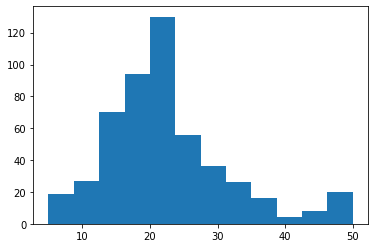

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
dtype: float64

In [ ]:
from sklearn import datasets
boston = datasets.load_boston()
boston.keys()
X, y = boston.data, boston.target
import scipy.stats as stats
pv1=stats.normaltest(y) # Pearson卡方
pv2=stats.skew(y) #接近0表示不偏
pv3=stats.describe(y)
print(pv1,pv2,pv3)
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y, bins=12) #直方圖
plt.show()
import pandas as pd
pd.Series(y).describe() #統計量


Step3:
我們再將train_set分為train和validation
並分別命名為X_train和X_test
並設定X_train和X_test的比例約為4:1

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)#這行不要動

print("number of test samples :", X_test.shape[0])
print("number of training samples:",X_train.shape[0])


number of test samples : 100
number of training samples: 406


Step4:
我們透過.isnull( ).sum( )找出X_train和X_test是否有遺漏值

In [26]:
X_train.isnull( ).sum( )

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [27]:
X_test.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Step5:
我們透過線性回歸中最小平方法的方式
分別找出X_train對應y_train和X_test對應y_test的R^2

In [28]:
from sklearn.linear_model import LinearRegression
#創建線性回歸
lm = LinearRegression()
lm.fit(X_train, y_train) # use all features and train data to create model
print(lm.intercept_,lm.coef_)
r2_train= lm.score(X_train, y_train)
r2_test= lm.score(X_test, y_test)
print(r2_train, r2_test)

42.28626298344837 [-1.11032620e-01  5.79772626e-02  1.68950489e-02  2.13839616e+00
 -1.92748521e+01  3.11124463e+00  5.50103108e-03 -1.48228753e+00
  3.01624408e-01 -1.11359165e-02 -9.88363922e-01  7.97485768e-03
 -5.42907603e-01]
0.7293635681762961 0.7652426102750569


特徵工程


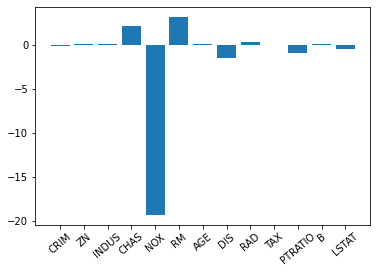

In [29]:
# 畫圖 從高到低 去畫出 特徵重要性
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(feature_names , lm.coef_)
plt.xticks(rotation=40)
plt.show()

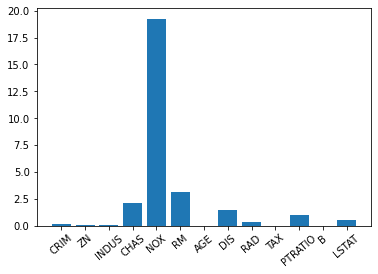

In [30]:
# 畫圖 從高到低 去畫出 特徵重要性
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(feature_names , abs(lm.coef_))
plt.xticks(rotation=40)
plt.show()

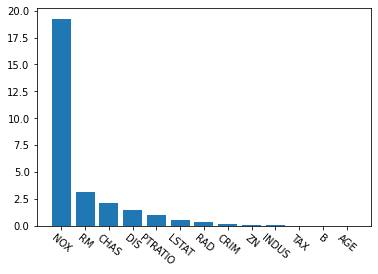

,score,feature
4,19.274852,NOX
5,3.111245,RM
3,2.138396,CHAS
7,1.482288,DIS
10,0.988364,PTRATIO
12,0.542908,LSTAT
8,0.301624,RAD
0,0.111033,CRIM
1,0.057977,ZN
2,0.016895,INDUS


In [31]:
feature_sort = pd.DataFrame( abs(lm.coef_), columns=['score'])
feature_sort['feature'] = feature_names
feature_sort = feature_sort.sort_values(by='score', ascending=False)
# 使用table 方式進行排序
plt.bar(feature_sort['feature'] , feature_sort['score'])
plt.xticks(rotation=-40)
plt.show()
feature_sort

In [32]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(estimator=LinearRegression()).fit(X_train, y_train)
import numpy as np
#修改資料呈現方式
np.set_printoptions(suppress=True)
selector.estimator_.coef_, boston.feature_names

(array([ -0.11103262,   0.05797726,   0.01689505,   2.13839616,
        -19.27485205,   3.11124463,   0.00550103,  -1.48228753,
          0.30162441,  -0.01113592,  -0.98836392,   0.00797486,
         -0.5429076 ]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

尋找中位數(or 平均值)

In [33]:
selector.threshold_ 

2.15770715764712

In [34]:
selector.get_support(), boston.feature_names
boston.feature_names[selector.get_support()]

array(['NOX', 'RM'], dtype='<U7')

In [35]:
selector.transform(X_train).shape

(406, 2)

In [36]:
p=2
lm.fit(selector.transform(X_train), y_train) # use selected features and train data to create model
r2_train= lm.score(selector.transform(X_train), y_train)
r2_test= lm.score(selector.transform(X_test), y_test)
r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p-1)) )
print(r2_train, r2_test, r2_adj)

0.513678159069731 0.6016329180434612 0.5934191637763161


標準化

In [37]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

In [38]:
from sklearn.linear_model import LinearRegression as lm 
selector = SelectFromModel(estimator=lm()).fit(X_std, y_train)

In [39]:
selector.estimator_.coef_

array([-1.01350474,  1.34600685,  0.11557489,  0.57619956, -2.25207327,
        2.13772192,  0.15680574, -3.13809674,  2.62646459, -1.88649713,
       -2.13976217,  0.73920792, -3.90753383])

In [40]:
selector.threshold_

1.6950345655365453

In [41]:
selector.get_support(), boston.feature_names

(array([False, False, False, False,  True,  True, False,  True,  True,
         True,  True, False,  True]),
 array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7'))

In [42]:
boston.feature_names[selector.get_support()]

array(['NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT'], dtype='<U7')

In [43]:
selector.transform(X_train).shape

(406, 7)

In [44]:
selector.transform(X_train)

array([[  0.584 ,   5.837 ,   1.9976, ..., 666.    ,  20.2   ,  15.69  ],
       [  0.74  ,   6.485 ,   1.9784, ..., 666.    ,  20.2   ,  18.85  ],
       [  0.448 ,   6.169 ,   5.7209, ..., 233.    ,  17.9   ,   5.81  ],
       ...,
       [  0.693 ,   6.405 ,   1.6768, ..., 666.    ,  20.2   ,  19.37  ],
       [  0.507 ,   6.086 ,   3.6519, ..., 307.    ,  17.4   ,  10.88  ],
       [  0.499 ,   5.85  ,   3.9342, ..., 279.    ,  19.2   ,   8.77  ]])

22.47438423645322 [-1.01350474  1.34600685  0.11557489  0.57619956 -2.25207327  2.13772192
  0.15680574 -3.13809674  2.62646459 -1.88649713 -2.13976217  0.73920792
 -3.90753383]


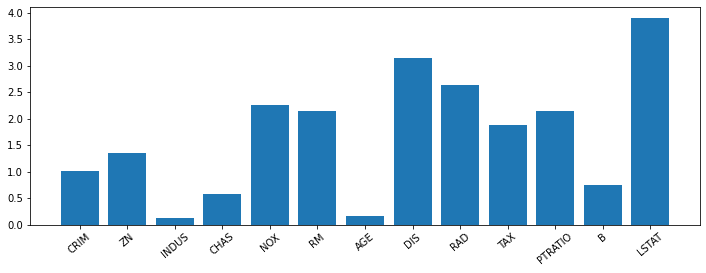

In [45]:
#創建線性回歸
lm = LinearRegression()
lm.fit(X_std, y_train)
print(lm.intercept_ , lm.coef_)
# 畫圖 特徵重要性

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
        'TAX', 'PTRATIO', 'B', 'LSTAT']
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.bar(feature_names , abs(lm.coef_))
plt.xticks(rotation=40)
plt.show()

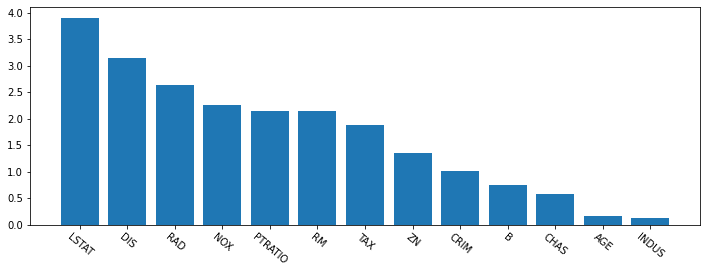

,score,feature
12,3.907534,LSTAT
7,3.138097,DIS
8,2.626465,RAD
4,2.252073,NOX
10,2.139762,PTRATIO
5,2.137722,RM
9,1.886497,TAX
1,1.346007,ZN
0,1.013505,CRIM
11,0.739208,B


In [46]:
# 畫圖 從高到低 去畫出 特徵重要性
# 使用table 方式進行排序
plt.figure(figsize=(12, 4))
feature_sort = pd.DataFrame( abs(lm.coef_), columns=['score'])
feature_sort['feature'] = feature_names
feature_sort = feature_sort.sort_values(by='score', ascending=False)
# 使用table 方式進行排序
plt.bar(feature_sort['feature'] , feature_sort['score'])
plt.xticks(rotation=-40)
plt.show()
feature_sort

In [47]:
p=7
lm.fit(selector.transform(X_train), y_train) # use train data to create model
r2_train= lm.score(selector.transform(X_train), y_train)
r2_test= lm.score(selector.transform(X_test), y_test)
r2_adj = 1 - ((1 - r2_test) * ((y_test.shape[0] - 1)/(y_test.shape[0] - p-1)) )
print(r2_train, r2_test, r2_adj) 

0.703109162977364 0.746474875709243 0.7271849206001637


In [48]:
lm.intercept_ , lm.coef_

(45.64257657158676,
 array([-18.0086473 ,   3.38104635,  -1.08639755,   0.19455093,
         -0.00887728,  -1.13665962,  -0.58922586]))

DecisionTree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
X = df[['LSTAT']].values
y = df['MEDVprice'].values

# 分出訓練 跟 驗證
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)

tree = DecisionTreeRegressor(max_depth=3)# 改變最多分枝 max_depth=1,2,3,4
tree.fit(X_train, y_train)
predict = tree.predict(X_train)
# DecisionTreeRegressor?

NameError: ignored

In [ ]:
# 使用table 方式進行排序
df_sort = pd.DataFrame(X_train, columns=['LSTAT'])
df_sort['MEDVprice'] = y_train
df_sort['predict'] = predict
df_sort = df_sort.sort_values(by='LSTAT', ascending= True)

df_sort

NameError: ignored

In [ ]:
#散布圖
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sort, x="LSTAT", y="MEDVprice", s=70, color='steelblue',edgecolor='white')
sns.lineplot(x='LSTAT', y='predict', data=df_sort , color='black', lw=2) 
# plt.scatter(X_test, y_test, c='g', edgecolor='white', s=70)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

print(tree.score(X_train, y_train))

print(tree.score(X_test, y_test))

from sklearn.metrics import mean_squared_error
print('MSE train:' , mean_squared_error(y_train, tree.predict(X_train)))
# print('MSE test:' , mean_squared_error(y_test, tree.predict(X_test)))

Random forest regression

In [ ]:
# 重設 X 包含所有特徵欄位
X = df.iloc[:, :-1].values
y = df['MEDVprice'].values

# 分出訓練 跟 驗證
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.197, random_state=1)
X_train.shape , y_train.shape,X_test.shape , y_test.shape

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)


forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))
# RandomForestRegressor?

MSE train: 1.401, test: 8.607
R^2 train: 0.983, test: 0.913


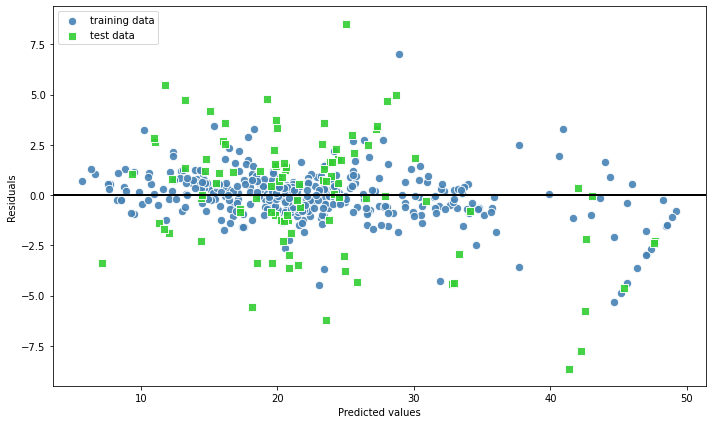

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=70,
            alpha=0.9,
            label='training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=70,
            alpha=0.9,
            label='test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.axhline(y=0, lw=2, color='black')
plt.tight_layout()

# plt.savefig('images/10_14.png', dpi=300)
plt.show()

Feature: 0, Score: 0.04655
Feature: 1, Score: 0.00137
Feature: 2, Score: 0.00842
Feature: 3, Score: 0.00088
Feature: 4, Score: 0.02418
Feature: 5, Score: 0.28313
Feature: 6, Score: 0.01865
Feature: 7, Score: 0.06068
Feature: 8, Score: 0.00444
Feature: 9, Score: 0.01349
Feature: 10, Score: 0.01956
Feature: 11, Score: 0.01303
Feature: 12, Score: 0.50563


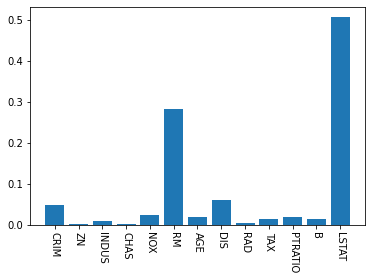

In [ ]:
# get importance
importance = forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
cls=['CRIM','ZN','INDUS','CHAS','NOX','RM' ,'AGE','DIS','RAD','TAX', 'PTRATIO','B','LSTAT']
plt.bar(cls, importance)
plt.xticks(rotation=-90)
plt.show()